<a href="https://colab.research.google.com/github/sdfjslfjafkdl/Deep-Learning-Base-5/blob/main/step02/step02_hist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 불러오기

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### 파일 불러오기

In [3]:
xs = np.loadtxt('height.txt')
print(xs.shape)

(25000,)


### 히스토그램 그리기

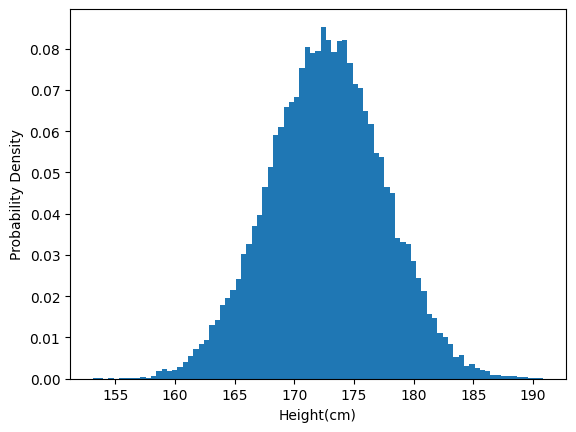

In [8]:
plt.hist(xs, bins = 'auto', density=True)
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.show()
# 그래프가 정규 분포와 비슷하므로 정규 분포로 모델링하기로 결정!

### 정규 분포를 따르는 생성 모델 구현하기
1. 모델링: 키 데이터가 정규 분포라 가정
2. 매개변수 추정(학습): 샘플을 기반으로 정규 분포의 매개변수 추정

In [5]:
# 모델링 -> 이미 앞선 히스토그램 그래프에서 정규분포라는 것을 알아냄. 가정 완료!
# 매개변수 추정(mu, sigma)
mu = np.mean(xs) # 정규분포의 매개변수는 최대 가능도 추정에 의해 mu = 평균
sigma = np.std(xs) # 정규분포의 매개변수는 최대 가능도 추정에 의해 sigma = 표준편차

print(mu)
print(sigma)

172.70250853667997
4.830167473396299


### 새로운 데이터 생성하기

In [6]:
# 넘파이의 np.random.normal(loc=, scale=, size=) 함수를 통해 새로운 데이터 생성
# np.random.normal(loc=, scale=, size=)은 정규 분포를 따르는 무작위 값을 생성시키는 함수
# loc=평균, scale=표준 편차, size=생성할 값 개수. size를 지정하지 않으면 기본값은 None으로, 값 1개만 생성함
sample = np.random.normal(loc=mu, scale=sigma)
print(sample)

177.1375352618229


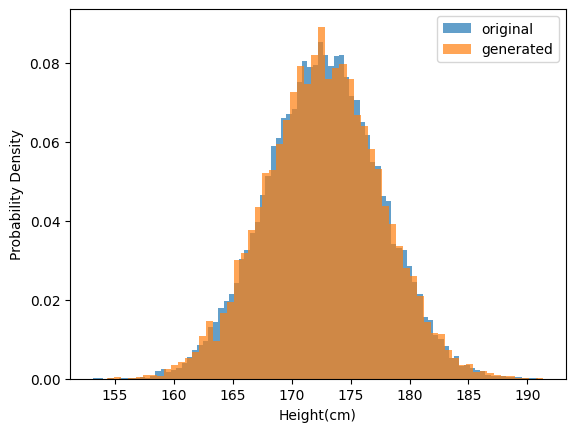

In [9]:
# 생성 모델에서 1만 개 샘플 추출하여 분포 살펴보기
samples = np.random.normal(mu, sigma, 10000)

plt.hist(xs, bins='auto', density=True, alpha=0.7, label='original')
plt.hist(samples, bins='auto', density=True, alpha=0.7, label='generated')
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# 두 분포가 거의 일치한다.

### 현재 데이터의 분포에 대해서 특정 값이 발생할 확률 계산해보기
- 연속 확률 분포에서 확률을 구하려면 확률분포를 적분해야 함
- 정규분포의 경우 확률 분포의 적분을 해석적으로, 즉 수식을 풀어 구할 수 있음
- 이를 위해 scipy의 cdf() 함수를 이용
- cdf(값, loc=평균, scale=표준편차) 여기서 값을 넣으면 특정 평균과 표준편차를 따르는 확률 분포에서 이 값 이하의 값이 발생할 확률을 구하게 됨.

ex) cdf 함수를 사용하면 x <= 1 이하 구간의 확률 분포의 면적을 구하게 되는 것이므로 x <= 1일 확률을 구하게 되는 것!

In [11]:
p1 = norm.cdf(160, mu, sigma)
print('p(x <= 160): ', p1) # 키가 160 이하일 확률

p2 = norm.cdf(180, mu, sigma)
print('p(x > 180): ', 1 - p2) # 키가 180보다 클 확률(1 - 키가 180 이하일 확률)

p(x <= 160):  0.004271406830855
p(x > 180):  0.06541774339950823
